In [5]:
import pickle
import numpy as np 
import gym 
import os

In [6]:
envname = "Ant-v2"

In [7]:
with open(os.path.join('expert_data', envname + '.pkl'), 'rb') as f:
    expert_data = pickle.load(f)
# data for behavioural cloning
X = expert_data['observations']
Y = expert_data['actions']

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Reshape
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

In [7]:
model = Sequential()
model.add(Dense(32, input_shape=X[0].shape))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(len(Y[0][0])))
model.add(Reshape(Y[0].shape))
model.compile(loss='mse', optimizer='Adam')

In [8]:
metrics = model.fit(X_train, 
          Y_train,
          epochs=50,
          batch_size=64,
          verbose=0,
          validation_data=(X_val, Y_val))

In [9]:
metrics.history['loss'][-1], metrics.history['val_loss'][-1]

(0.23127920084529452, 0.26755443572998044)

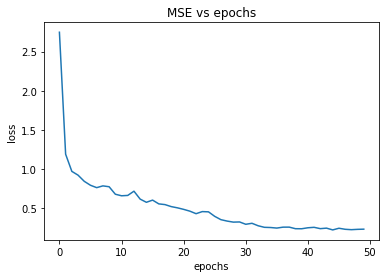

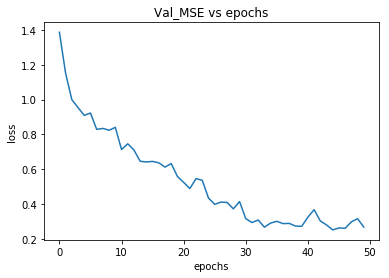

In [11]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(metrics.history['loss']))), metrics.history['loss'])
plt.title('MSE vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(list(range(len(metrics.history['val_loss']))), metrics.history['val_loss'])
plt.title('Val_MSE vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Rollouts

In [12]:
env = gym.make(envname)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [13]:
num_rollouts = 1
max_steps = 1000
render = True

In [1]:
returns = []

for i in range(num_rollouts):
    obs = env.reset()
    done = False
    totalr = 0
    steps = 0
    while (not done) and steps <= max_steps:
        action = model.predict(obs[None, :])
        obs, r, done, _ = env.step(action)
        totalr += r
        steps += 1
        if steps % 100 == 0: print("%i/%i"%(steps, max_steps))
    
    returns.append(totalr)

In [21]:
np.mean(returns), np.std(returns)

(454.82075023520247, 10.265224726945519)

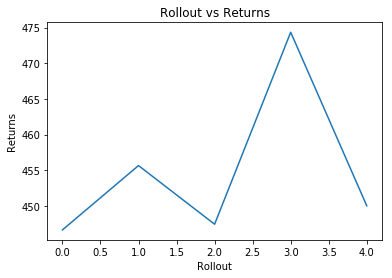

In [25]:
plt.plot(list(range(len(returns))), returns)
plt.title("Rollout vs Returns")
plt.xlabel("Rollout")
plt.ylabel("Returns")
plt.show()